# 🏡 **Bengaluru House Price Prediction**

In [3]:
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import sklearn
import xgboost



# 📜 Problem Statement

### By analyzing these Bengaluru house data, we will determine the approximate price for the houses.

# 📊 Dataset Overview

---

<div style="color: white; display: fill; border-radius: 5px; background-color: #D3D3D3; font-size: 100%; font-family: Verdana; padding: 7px;">
    <h2>Data Description</h2>
    <ul style="padding-left: 20px; color: black;">
        <li>📌 <b>Area_type</b> - Description of the area</li>
        <li>📌 <b>Availability</b> - When it can be possessed or when it is ready</li>
        <li>📌 <b>Location</b> - Where it is located in Bengaluru</li>
        <li>📌 <b>Size</b> - BHK or Bedrooms</li>
        <li>📌 <b>Society</b> - To which society it belongs</li>
        <li>📌 <b>Total_sqft</b> - Size of the property in sq.ft</li>
        <li>📌 <b>Bath</b> - No. of Bathrooms</li>
        <li>📌 <b>Balcony</b> - No. of the Balcony</li>
        <li>📌 <b>Price</b> - Value of the property in lakhs (Indian Rupee - <b>₹</b>)</li>
    </ul>
</div>

---

In [4]:
home = pd.read_csv("C:\\mkc\\bengaluru_house_prices.csv")
home.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
home.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

<h3 style="background-color: #e9ecef; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #495057; 
           border: 2px solid #adb5bd; 
           border-radius: 8px">
<br> <small style="color: #6c757d;">Exploratory Data Analysis (EDA)</small>
</h3>

In [5]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Preprocessing!

In [6]:


round(100*(home.isnull().sum()/len(home.index)),2)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

<h3 style="background-color: #f8f9fa; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #343a40; 
           border: 2px solid #6c757d; 
           border-radius: 8px">
Removing NaN Values and Unnecessary Columns
</h3>

In [7]:
home.dropna(inplace =True)

In [8]:
home = home.drop(columns='society')

In [9]:
home.reset_index(drop= True, inplace =True)

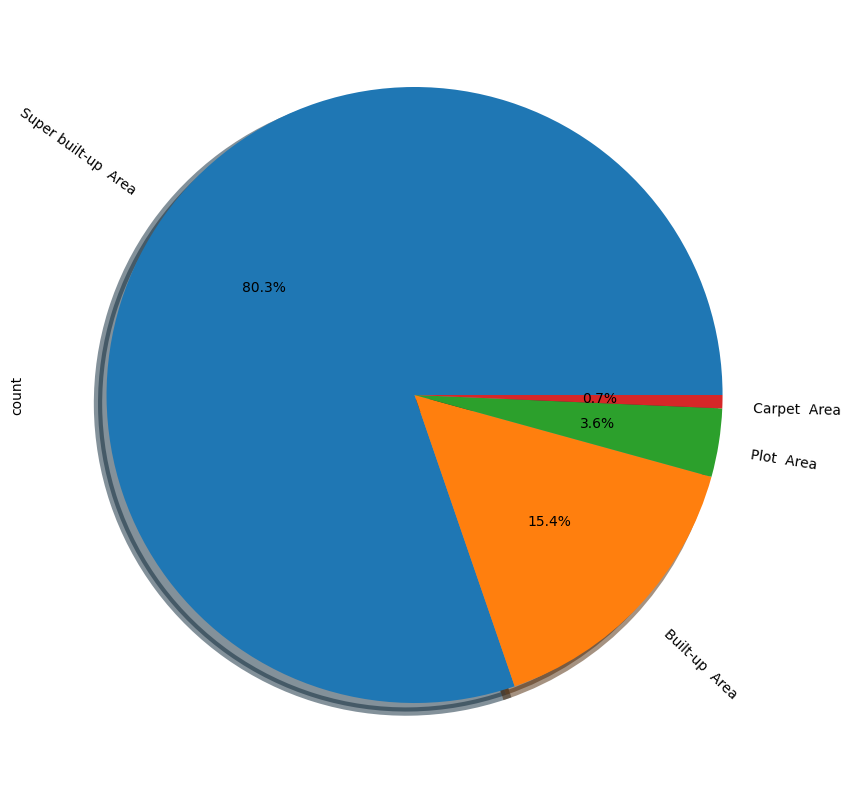

In [10]:
(home["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=1)
plt.show()

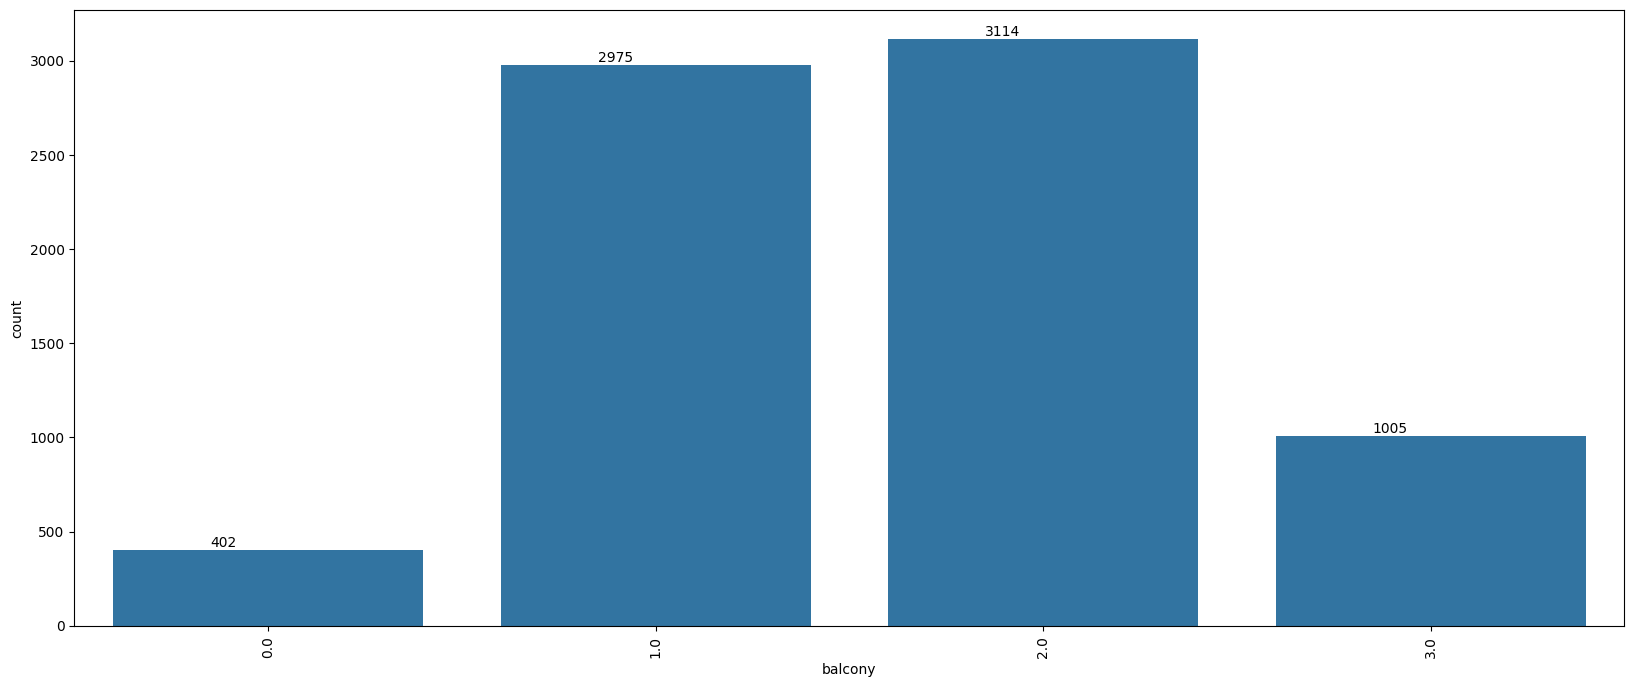

In [11]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = home)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

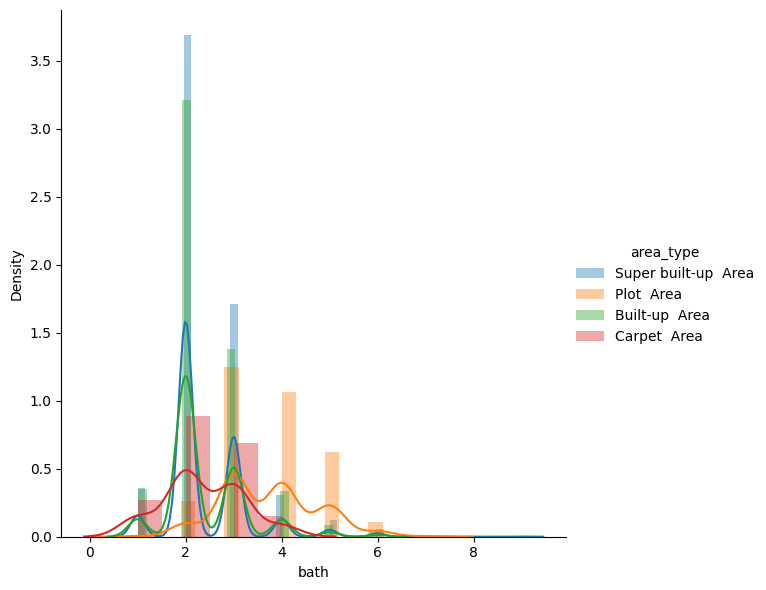

In [12]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(home, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

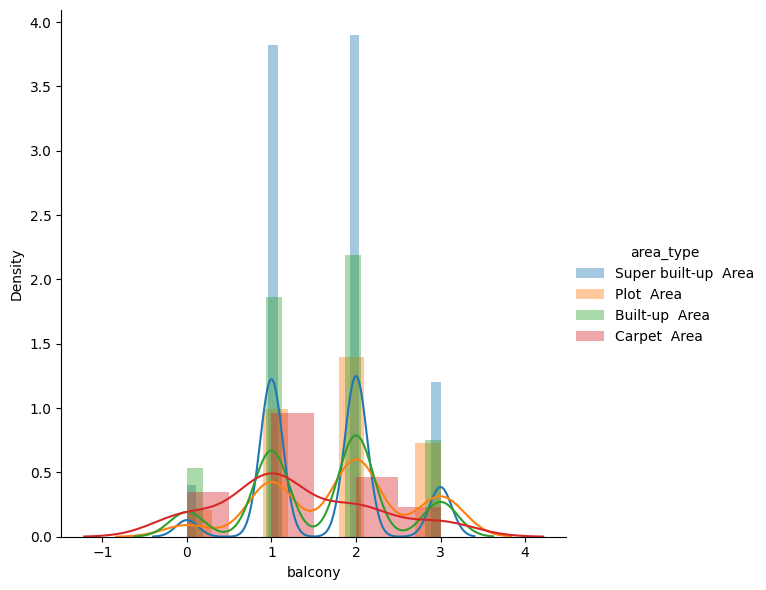

In [13]:
sns.FacetGrid(home, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

<h3 style="background-color: #f1f3f5; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #212529; 
           border: 2px solid #ced4da; 
           border-radius: 8px">
Extracting BHK from Size Column
</h3>

In [14]:
home['bhk'] = home['size'].str.split().str[0]
home['bhk'].dropna(inplace = True)
home['bhk'] = home['bhk'].astype('int')

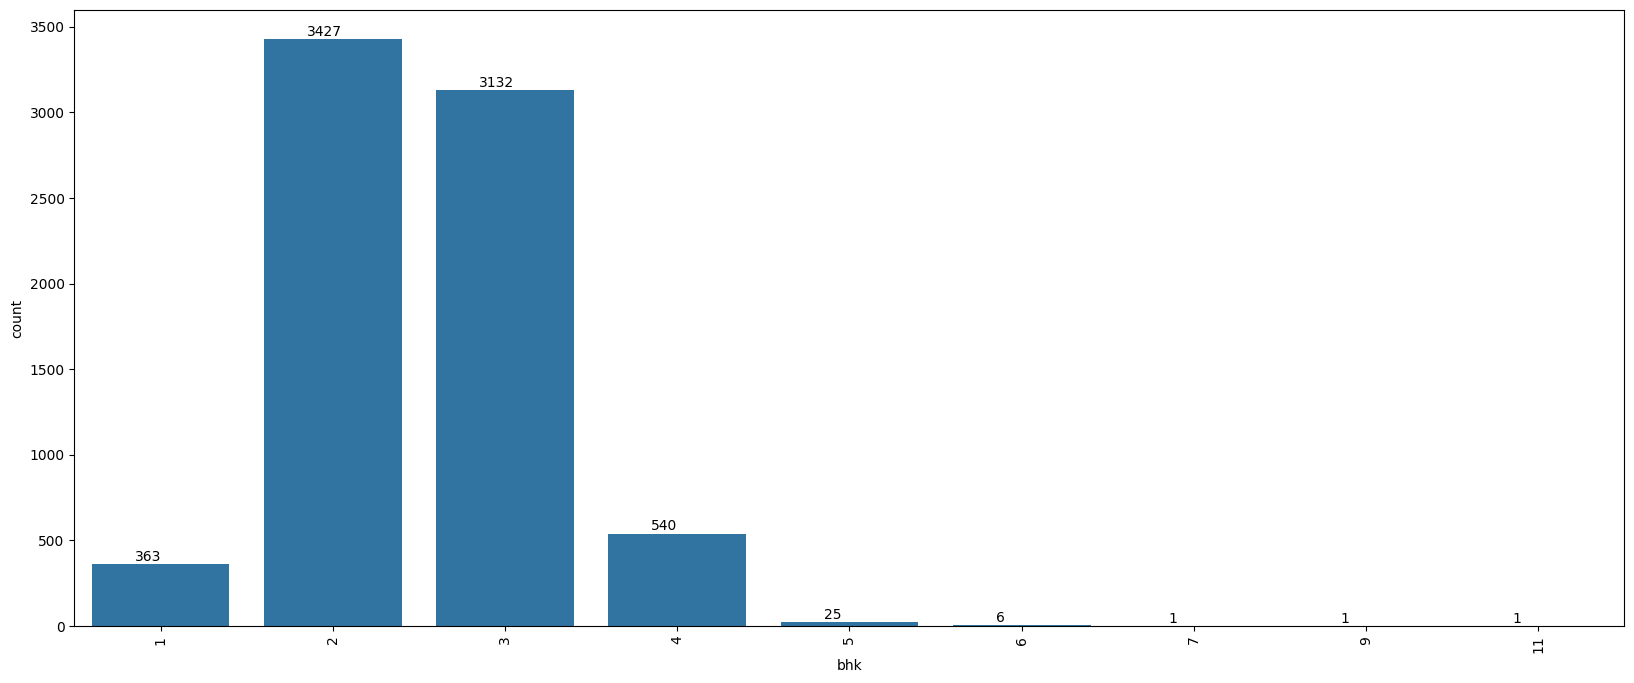

In [15]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'bhk', data = home)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

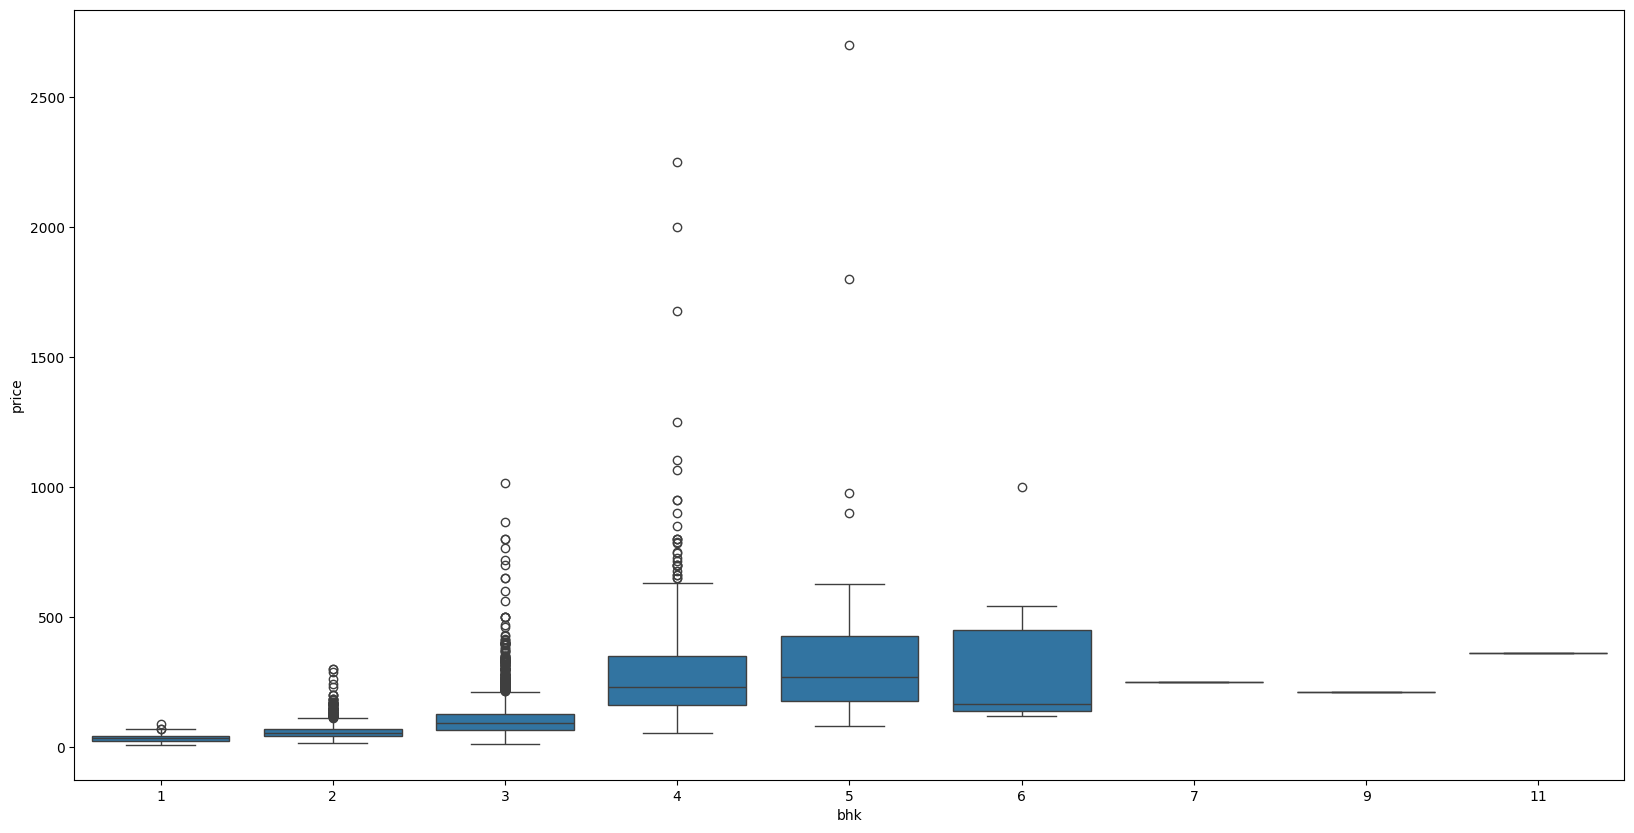

In [16]:
sns.boxplot(x = 'bhk', y = 'price', data = home)
plt.show()

In [17]:
print(home['total_sqft'].iloc[[17]])

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

17    2100 - 2850
Name: total_sqft, dtype: object


In [18]:
home.total_sqft = home.total_sqft.apply(convert_sqft_to_num)
home = home[home.total_sqft.notnull()]
home.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


<h3 style="background-color: #e9ecef; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #495057; 
           border: 2px solid #adb5bd; 
           border-radius: 8px">
Removing Invalid Data Entries <br> <small style="color: #6c757d;">Example: The total sqft divided by the number of BHK should always be more than 300</small>
</h3>

In [19]:
home = home[~(home.total_sqft/home.bhk<200)]
home.shape

(7478, 9)

<h3 style="background-color: #f8f9fa; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #343a40; 
           border: 2px solid #6c757d; 
           border-radius: 8px">
Dividing the Dataset into Continuous and Categorical Variables
</h3>

In [20]:
cont_ = home.select_dtypes(exclude = 'object')
cat_ = home.select_dtypes(include  = 'object')

<h3 style="background-color: #f1f3f5; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #212529; 
           border: 2px solid #ced4da; 
           border-radius: 8px">
Displaying Continuous Variables <br> <small style="color: #6c757d;">To determine which variables have outliers and which need to be removed</small>
</h3>

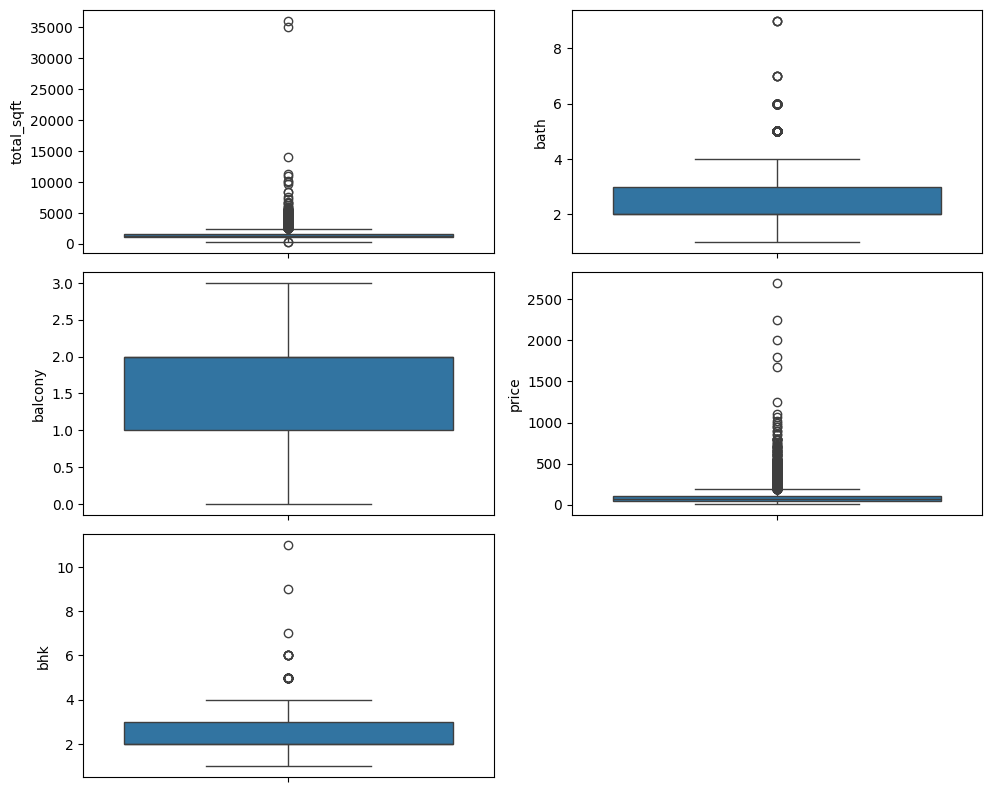

In [21]:
fig = plt.figure(figsize = (10,8))
for index,col in enumerate(cont_):
    plt.subplot(3,2,index+1)
    sns.boxplot(y = cont_.loc[:,col])
fig.tight_layout(pad = 1.0)

In [22]:
home = home.drop(home[home['bath']>6].index)
home = home.drop(home[home['bhk']>7.0].index)

In [23]:
home['price_per_sqft'] = home['price']*100000/home['total_sqft']
home.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
3,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
4,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605


In [2]:
home.columns

NameError: name 'home' is not defined

In [24]:
home['price_per_sqft'].describe()

count     7471.000000
mean      5853.051952
std       2720.468727
min        371.428571
25%       4277.681409
50%       5315.315315
75%       6693.387739
max      76530.612245
Name: price_per_sqft, dtype: float64

<h3 style="background-color: #e9ecef; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #495057; 
           border: 2px solid #adb5bd; 
           border-radius: 8px">
Taking Values Within 1st Standard Deviation <br> <small style="color: #6c757d;">As per Normal Distribution, 95% of our data lies within 1st Standard Deviation</small>
</h3>

In [25]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
home = remove_pps_outliers(home)
home.shape

(5389, 10)

<h3 style="background-color: #f8f9fa; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #343a40; 
           border: 2px solid #6c757d; 
           border-radius: 8px">
Finding Correlation Values <br> <small style="color: #6c757d;">Removing features highly correlated with each other as they do not provide additional significance to the model</small>
</h3>

In [27]:
import plotly.graph_objects as go

corr = home.corr(numeric_only=True)

# Masking correlations less than 0.8
mask = corr < 0.8
corr_masked = corr.copy()
corr_masked[mask] = np.nan

fig = go.Figure(data=go.Heatmap(
    z=corr_masked.values,
    x=corr_masked.columns,
    y=corr_masked.columns,
    colorscale='Blues',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlation'),
    showscale=True
))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickvals=list(corr_masked.columns), ticktext=list(corr_masked.columns)),
    yaxis=dict(tickvals=list(corr_masked.columns), ticktext=list(corr_masked.columns)),
    height=800,  # Adjust height for better fit
    width=800,   # Adjust width for better fit
    margin=dict(l=50, r=50, t=50, b=50)
)

fig.show()

In [28]:
home.drop(columns=['availability','size','area_type'],inplace = True)

<h3 style="background-color: #f1f3f5; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #212529; 
           border: 2px solid #ced4da; 
           border-radius: 8px">
Checking Dataset with Highest Location Data <br> <small style="color: #6c757d;">Because having values for a location less than 10 won't provide significant information for the dataset</small>
</h3>


In [29]:
home.location = home.location.str.strip()
location_stats = home['location'].value_counts(ascending=False)
location_stats

location
Whitefield                  357
Sarjapur  Road              240
Electronic City             225
Kanakpura Road              157
Yelahanka                   141
                           ... 
Chikka Banaswadi              1
Sanne Amanikere               1
Sai Gardens                   1
Chikku Lakshmaiah Layout      1
Kammagondahalli               1
Name: count, Length: 430, dtype: int64

<h3 style="background-color: #e9ecef; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #495057; 
           border: 2px solid #adb5bd; 
           border-radius: 8px">
Creating a Series of Locations with Fewer Than 10 Entries <br> <small style="color: #6c757d;">Identifying locations with less than 10 entries to assess their impact on the dataset</small>
</h3>

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Neeladri Nagar              10
Munnekollal                 10
Kannamangala                10
Gubbalala                   10
Anandapura                  10
                            ..
Chikka Banaswadi             1
Sanne Amanikere              1
Sai Gardens                  1
Chikku Lakshmaiah Layout     1
Kammagondahalli              1
Name: count, Length: 319, dtype: int64

In [31]:
home.location = home.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

home = home[home.location != 'other']

<h3 style="background-color: #f8f9fa; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #343a40; 
           border: 2px solid #6c757d; 
           border-radius: 8px">
Ensuring Bathroom Count ≤ BHK + 2 <br> <small style="color: #6c757d;">Example: For a 3 BHK, the number of bathrooms shouldn't exceed 5</small>
</h3>

In [32]:
home = home[home.bath<home.bhk+2]

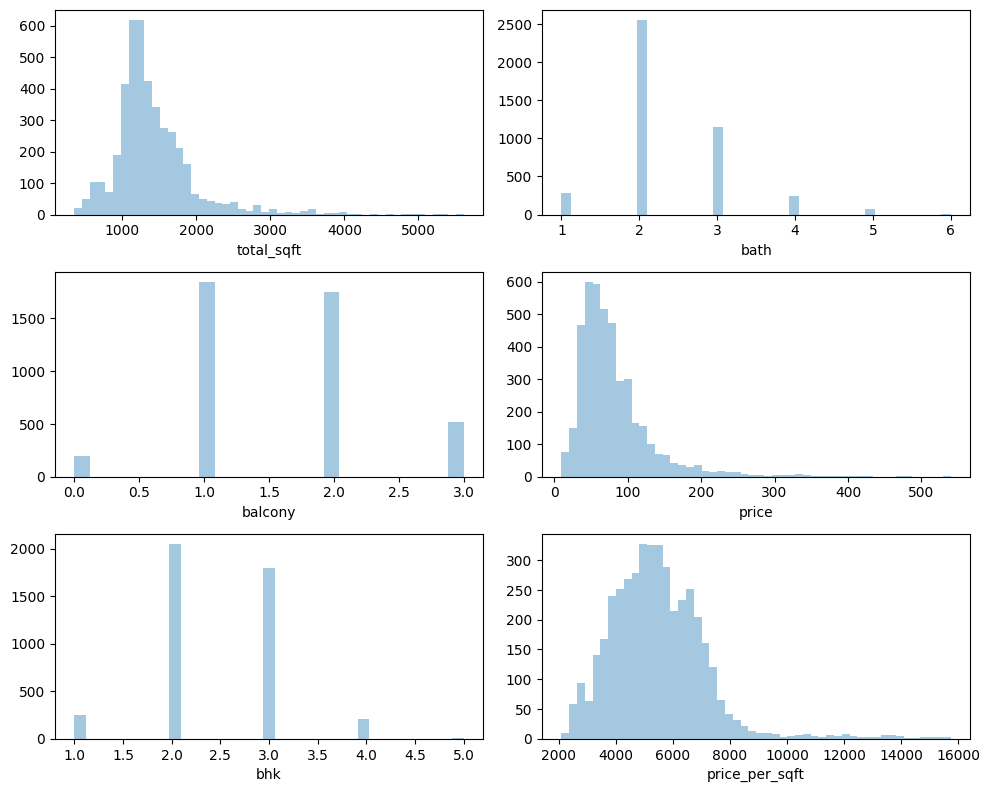

In [33]:
num_ = home.select_dtypes(exclude = 'object')
fig = plt.figure(figsize =(10,8))
for index, col in enumerate(num_):
    plt.subplot(3,2,index+1)
    sns.distplot(num_.loc[:,col],kde = False)
fig.tight_layout(pad = 1.0)  

<h3 style="background-color: #f1f3f5; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #212529; 
           border: 2px solid #ced4da; 
           border-radius: 8px">
Performing One-Hot Encoding on Categorical Values <br> <small style="color: #6c757d;">1st Step: Create Dummies</small>
</h3>

In [34]:
dummies = pd.get_dummies(home.location)

In [35]:

home = pd.concat([home,dummies],axis='columns')

home1 = home.drop('location',axis = 1)

home1 = home1.drop(columns=['balcony','price_per_sqft'])

In [36]:
home1.reset_index(drop = True)

,total_sqft,bath,price,bhk,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,550.0,1.0,27.00,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,440.0,1.0,28.00,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,510.0,1.0,25.25,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,510.0,1.0,25.25,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1080.0,2.0,72.00,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,1169.0,2.0,64.08,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4299,2500.0,3.0,138.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4300,1160.0,2.0,64.08,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4301,2503.0,3.0,138.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [37]:

X = home1.drop('price',axis = 1).values 
y = home1.price.values 

In [38]:
y = y[:,np.newaxis]

#  Preprocessing Data Values with StandardScaler 📏

<h3 style="background-color: #e9ecef; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #495057; 
           border: 2px solid #adb5bd; 
           border-radius: 8px;
           margin: 0;">
 Preprocessing Data Values with StandardScaler
</h3>

In [39]:
sc = preprocessing.StandardScaler()
X1 = sc.fit_transform(X)


In [40]:
Std_x1 = preprocessing.scale(X)

# ⚙️ Model Building 🔧


<h3 style="background-color: #f8f9fa; 
           padding: 15px; 
           font: bold 22px Arial; 
           color: #343a40; 
           border: 2px solid #6c757d; 
           border-radius: 8px">
Regression Model Building
</h3>

In [41]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import cross_validate as CV

In [42]:
cross1 = cross_val_score(lr,Std_x1,y,cv=5,scoring='neg_mean_squared_error')
print(cross1.mean())

-1.3681271319762056e+30


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.3,random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [51]:
from xgboost import XGBRegressor



In [52]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha=1.0),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

In [53]:
model_names = []
mae_Accuracy=[]
mse_Accuracy=[]
r2_Accuracy=[]

for algo in models:
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(algo.__class__.__name__)
    mae_Accuracy.append(mae)
    mse_Accuracy.append(mse)
    r2_Accuracy.append(r2)

In [54]:
model_df = pd.DataFrame({
    'Model': model_names,
    'mae_Accuracy': mae_Accuracy,
    'mse_Accuracy': mse_Accuracy,
    'r2_Accuracy': r2_Accuracy,
        })

In [55]:
model_df.sort_values(by='r2_Accuracy',ascending=False)

,Model,mae_Accuracy,mse_Accuracy,r2_Accuracy
5,RandomForestRegressor,9.145106,224.984232,0.903413
1,Ridge,10.355644,235.393186,0.898945
0,LinearRegression,10.355638,235.452199,0.898919
7,XGBRegressor,9.473207,260.190848,0.888299
6,GradientBoostingRegressor,11.763937,265.402912,0.886061
2,Lasso,12.546938,288.335751,0.876216
4,DecisionTreeRegressor,10.136066,329.245442,0.858653
3,ElasticNet,13.668323,382.488912,0.835796


In [1]:
# Function to take manual input and predict house price using RandomForestRegressor
def predict_price(total_sqft, bath, bhk, location_dummies):
    # Create a dictionary for the input data
    input_data = {
        'total_sqft': total_sqft,
        'bath': bath,
        'bhk': bhk,
    }
    
    # Add location dummies to the input data
    for loc in dummies.columns:
        input_data[loc] = 1 if loc == location_dummies else 0
    
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Standardize the input data
    input_scaled = sc.transform(input_df)
    
    # Predict the price using the trained RandomForestRegressor model
    predicted_price = models[5].predict(input_scaled)
    
    return predicted_price[0]

# Example usage
total_sqft = 1056.0
bath = 2.0
bhk = 2
location_dummies = 'Electronic City Phase II'

predicted_price = predict_price(total_sqft, bath, bhk, location_dummies)
print(f"The predicted price for the house is: ₹{predicted_price:.2f} lakhs")

NameError: name 'dummies' is not defined

In [57]:
from joblib import dump

# Export the trained RandomForestRegressor model
dump(models[5], 'random_forest_model.joblib')
dump(models[7], 'xgboost_model.joblib')

['xgboost_model.joblib']